In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [151]:
df = pd.read_excel("data/Dubai.xlsx")

In [152]:
df.head()

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2010-01-01,19.4,16.8,25.0,0.0,NaN,NaN,9.1,NaN,NaN,NaN
1,2010-01-02,20.5,17.0,23.1,4.3,NaN,233.0,14.1,NaN,NaN,NaN
2,2010-01-03,19.7,15.8,23.6,0.3,NaN,NaN,8.6,NaN,NaN,NaN
3,2010-01-04,19.9,16.0,23.2,0.0,NaN,NaN,7.7,NaN,NaN,NaN
4,2010-01-05,19.9,16.3,23.0,0.0,NaN,NaN,9.6,NaN,NaN,NaN


In [153]:
df.describe()

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
count,4796,4796.000000,4790.000000,4789.000000,4374.000000,0.0,3198.000000,4736.000000,0.0,2568.000000,0.0
mean,2016-07-25 12:00:00,29.472665,25.276054,34.426895,0.197508,NaN,170.600688,12.985642,NaN,1008.644159,NaN
min,2010-01-01 00:00:00,15.600000,7.800000,18.000000,0.000000,NaN,0.000000,4.900000,NaN,992.100000,NaN
25%,2013-04-13 18:00:00,23.900000,20.000000,28.200000,0.000000,NaN,71.000000,11.000000,NaN,1001.900000,NaN
50%,2016-07-25 12:00:00,30.300000,26.000000,35.300000,0.000000,NaN,205.000000,12.400000,NaN,1009.800000,NaN
75%,2019-11-06 06:00:00,34.800000,30.700000,40.200000,0.000000,NaN,251.000000,14.300000,NaN,1015.300000,NaN
max,2023-02-17 00:00:00,41.900000,38.000000,49.000000,80.000000,NaN,359.000000,39.500000,NaN,1024.800000,NaN
std,NaN,6.071992,6.103957,6.838871,2.171535,NaN,100.196718,3.205048,NaN,7.728304,NaN


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4796 entries, 0 to 4795
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    4796 non-null   datetime64[ns]
 1   tavg    4796 non-null   float64       
 2   tmin    4790 non-null   float64       
 3   tmax    4789 non-null   float64       
 4   prcp    4374 non-null   float64       
 5   snow    0 non-null      float64       
 6   wdir    3198 non-null   float64       
 7   wspd    4736 non-null   float64       
 8   wpgt    0 non-null      float64       
 9   pres    2568 non-null   float64       
 10  tsun    0 non-null      float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 412.3 KB


In [155]:
print(df.isnull().sum())

time       0
tavg       0
tmin       6
tmax       7
prcp     422
snow    4796
wdir    1598
wspd      60
wpgt    4796
pres    2228
tsun    4796
dtype: int64


In [156]:
df =df.drop(["snow", "wdir", "wpgt", "pres", "tsun"], axis=1)

In [157]:
df.head()

,time,tavg,tmin,tmax,prcp,wspd
0,2010-01-01,19.4,16.8,25.0,0.0,9.1
1,2010-01-02,20.5,17.0,23.1,4.3,14.1
2,2010-01-03,19.7,15.8,23.6,0.3,8.6
3,2010-01-04,19.9,16.0,23.2,0.0,7.7
4,2010-01-05,19.9,16.3,23.0,0.0,9.6


In [158]:
print(df.isnull().sum())

time      0
tavg      0
tmin      6
tmax      7
prcp    422
wspd     60
dtype: int64


In [159]:
df=df.dropna(subset=["tmin", "tmax"])
print(df.isnull().sum())

time      0
tavg      0
tmin      0
tmax      0
prcp    421
wspd     48
dtype: int64


In [160]:
df=df.fillna(df.mean())
print(df.isnull().sum())


time    0
tavg    0
tmin    0
tmax    0
prcp    0
wspd    0
dtype: int64


In [161]:
df.head()

,time,tavg,tmin,tmax,prcp,wspd
0,2010-01-01,19.4,16.8,25.0,0.0,9.1
1,2010-01-02,20.5,17.0,23.1,4.3,14.1
2,2010-01-03,19.7,15.8,23.6,0.3,8.6
3,2010-01-04,19.9,16.0,23.2,0.0,7.7
4,2010-01-05,19.9,16.3,23.0,0.0,9.6


In [162]:
# Checking for outliers using Quantile method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

time    2396 days 12:00:00
tavg                  10.9
tmin                  10.7
tmax                  12.0
prcp                   0.0
wspd                   3.2
dtype: object


<Axes: xlabel='wspd'>

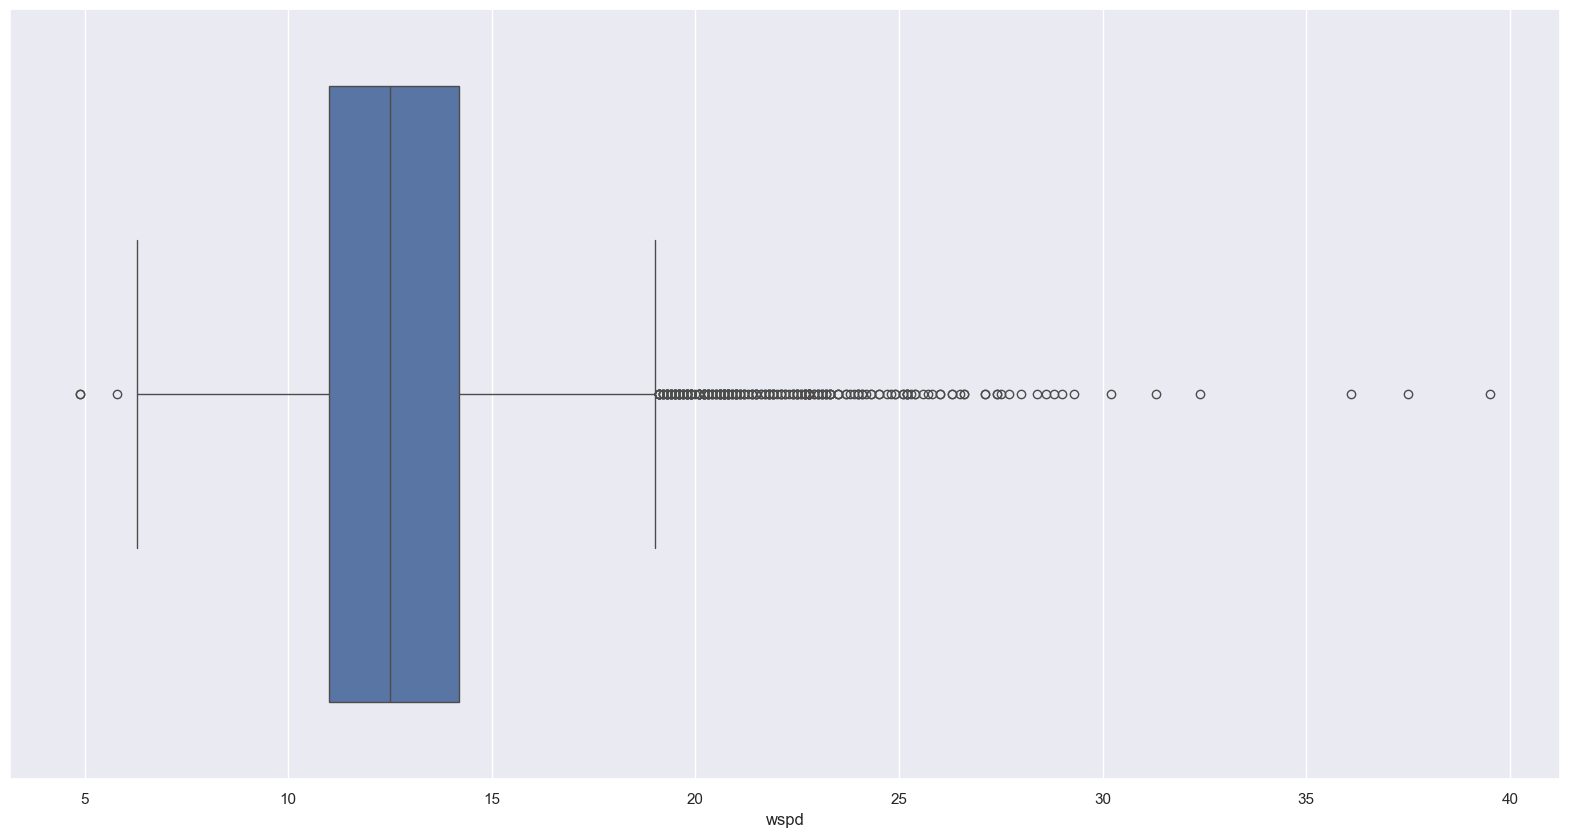

In [163]:
sns.set(color_codes=True)
plt.figure(figsize=(20,10))
sns.boxplot(x=df["wspd"])

<Axes: xlabel='prcp'>

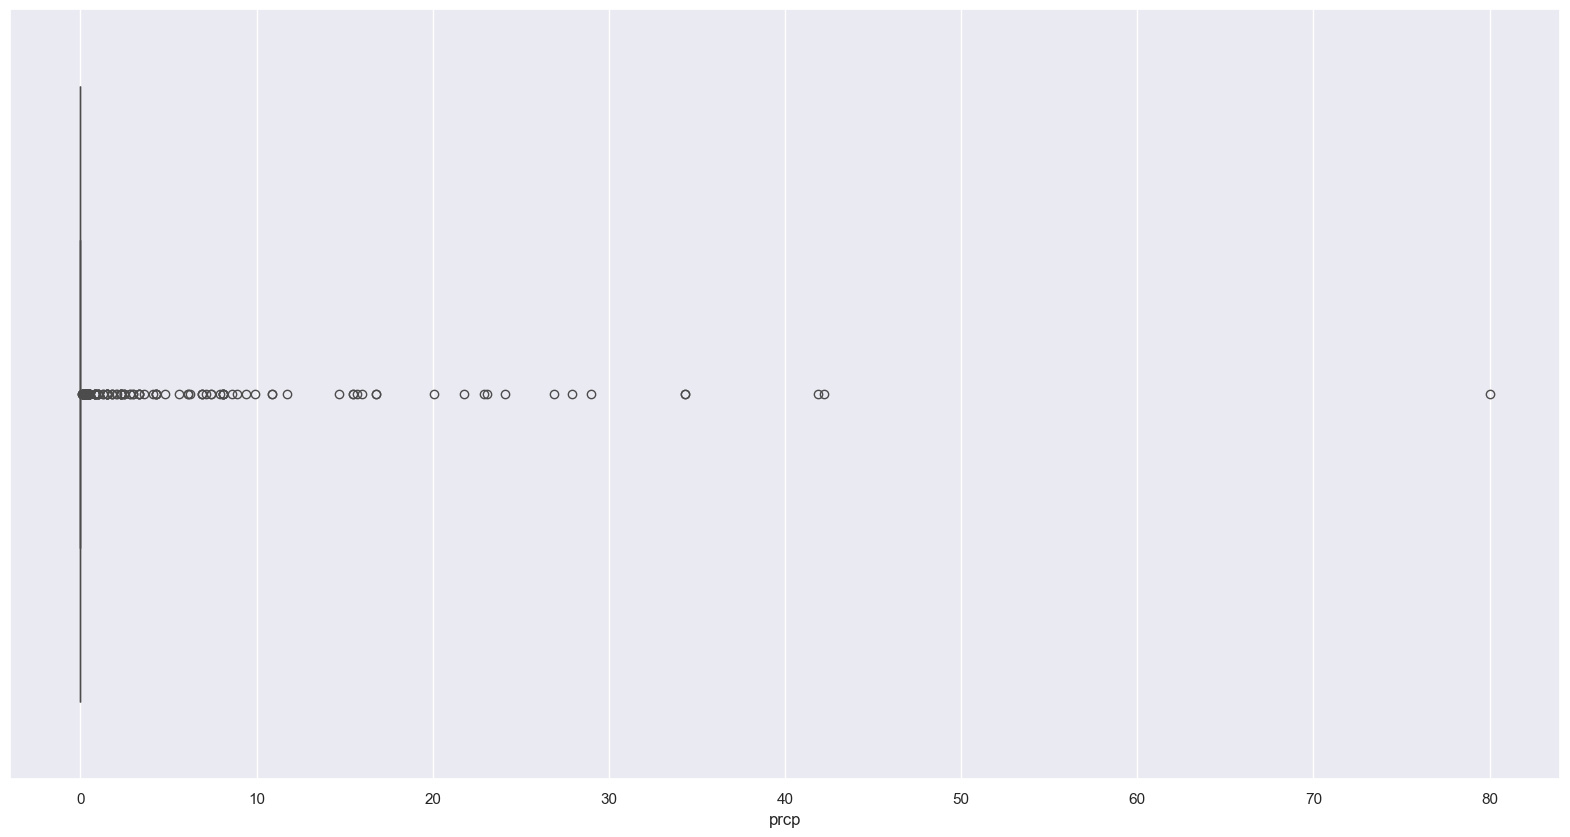

In [164]:
sns.set(color_codes=True)
plt.figure(figsize=(20,10))
sns.boxplot(x=df["prcp"])

<Axes: xlabel='tmax'>

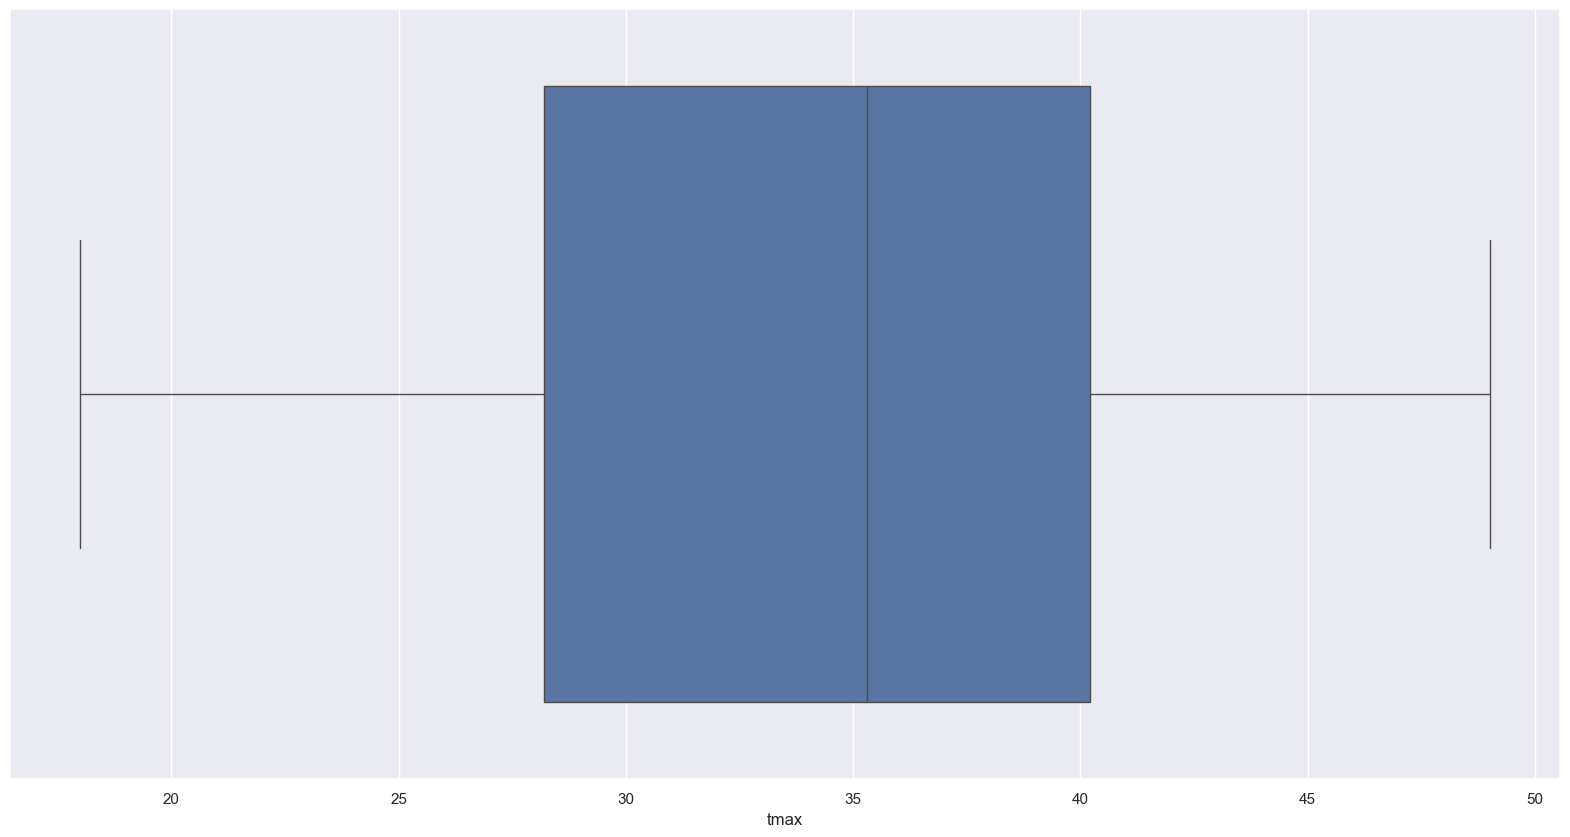

In [165]:
sns.set(color_codes=True)
plt.figure(figsize=(20,10))
sns.boxplot(x=df["tmax"])

<Axes: xlabel='tmin'>

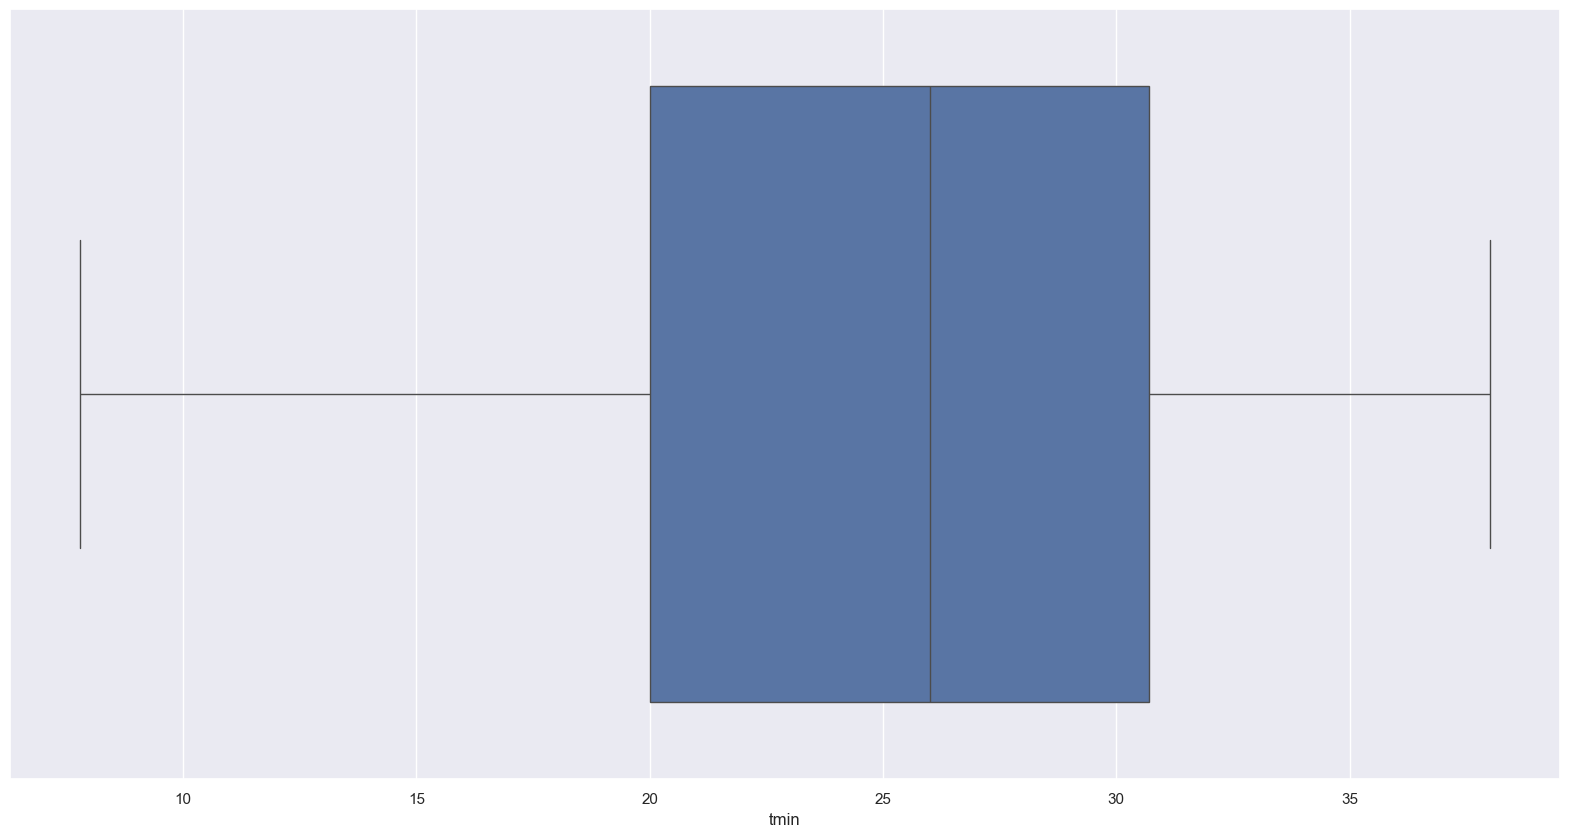

In [166]:
sns.set(color_codes=True)
plt.figure(figsize=(20,10))
sns.boxplot(x=df["tmin"])

<Axes: xlabel='tavg'>

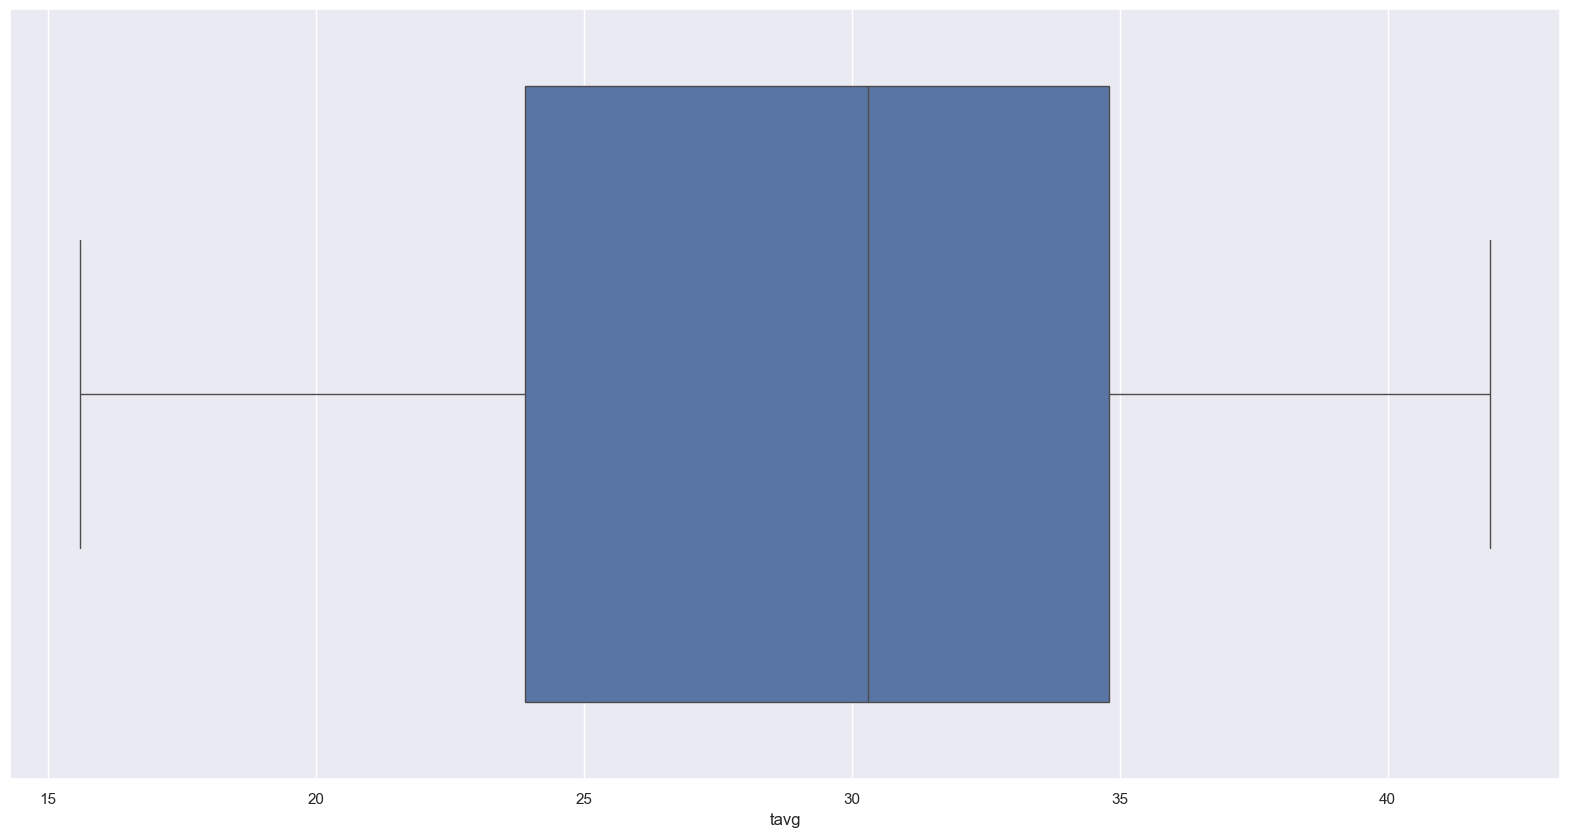

In [167]:
sns.set(color_codes=True)
plt.figure(figsize=(20,10))
sns.boxplot(x=df["tavg"])

<Axes: xlabel='time'>

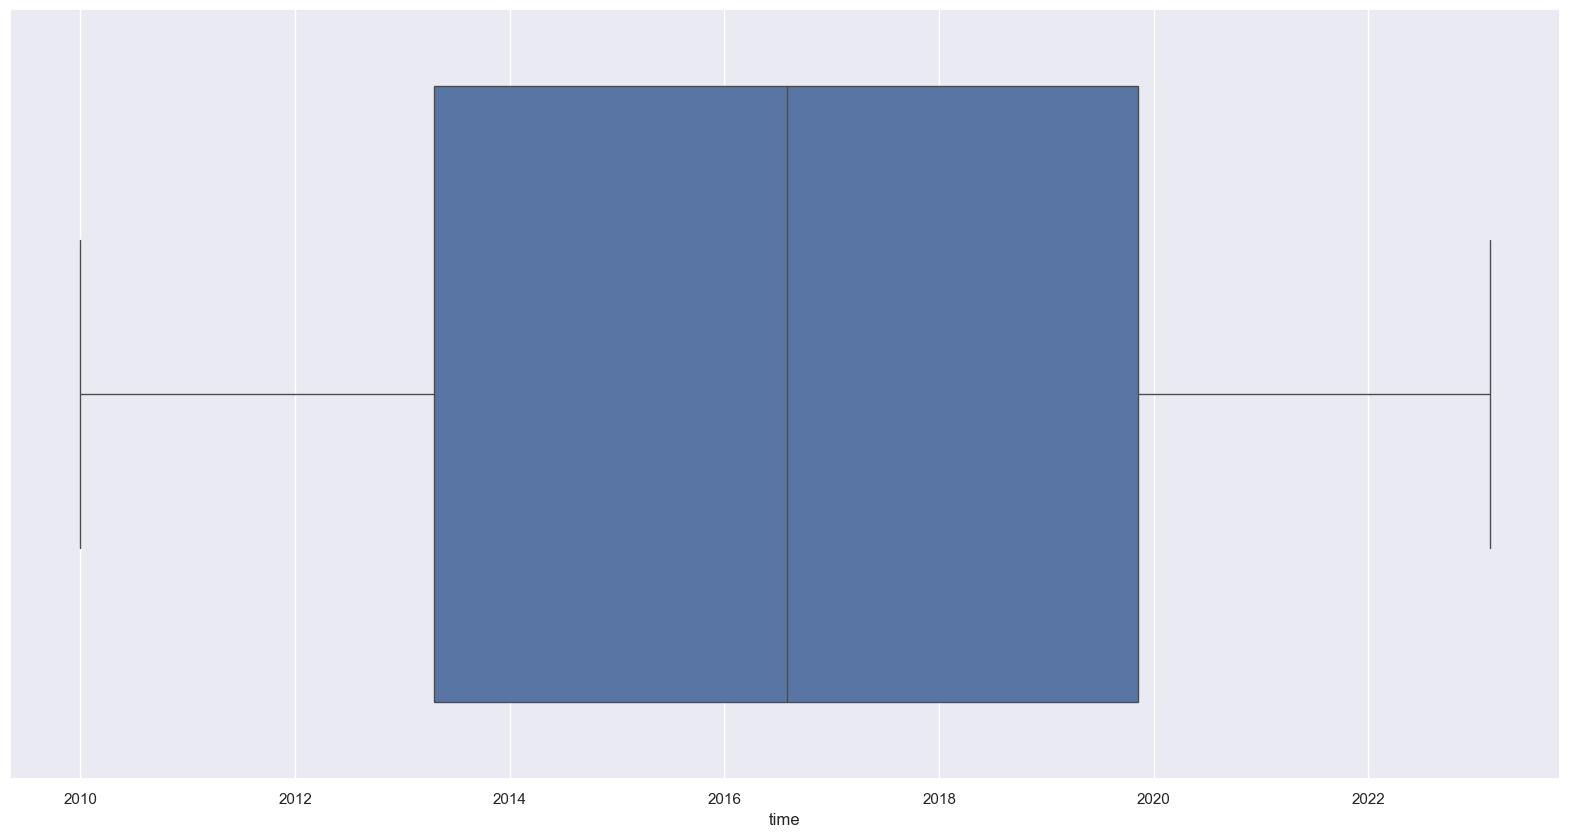

In [168]:
sns.set(color_codes=True)
plt.figure(figsize=(20,10))
sns.boxplot(x=df["time"])

In [169]:
# Calculating checkpoints for determining outliers
mean_wspd = df['wspd'].mean()
mean_prcp = df['prcp'].mean()
std_wspd = df['wspd'].std()
std_prcp = df['prcp'].std()

# Setting thresholds from the checkpoints
threshold_wspd = mean_wspd + 3*std_wspd
threshold_prcp = mean_prcp + 3*std_prcp

# Using thresholds to remove outliers
filtered_data = df[(np.abs(df['wspd'] - mean_wspd) <= threshold_wspd) & (np.abs(df['prcp'] - mean_prcp) <= threshold_prcp)]

# Printing the number of outliers removed
outliers_removed = len(df) - len(filtered_data)
print(f"Number of outliers removed: {outliers_removed}")

# Defining a function to calculate upper and lower quantiles
def outliers(data, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return upper_limit, lower_limit

# Using the function to calculate upper and lower quantiles
upper, lower = outliers(df, 'wspd')
upper, lower = outliers(df, 'prcp')

print("Upper whisker: ", upper)
print("Lower whisker: ", lower)

Number of outliers removed: 42
Upper whisker:  0.0
Lower whisker:  0.0


In [170]:
# Assigning the cleaned data to dataset variable
df = df[(df['wspd']<lower) | (df['wspd']>upper)]
df.head()

,time,tavg,tmin,tmax,prcp,wspd
0,2010-01-01,19.4,16.8,25.0,0.0,9.1
1,2010-01-02,20.5,17.0,23.1,4.3,14.1
2,2010-01-03,19.7,15.8,23.6,0.3,8.6
3,2010-01-04,19.9,16.0,23.2,0.0,7.7
4,2010-01-05,19.9,16.3,23.0,0.0,9.6


In [171]:
df = df[(df['prcp']<lower) | (df['prcp']>upper)]
df['prcp'] = df['prcp'].apply(lambda x: round(x, 1)) # Rounding the values
df.head()

,time,tavg,tmin,tmax,prcp,wspd
1,2010-01-02,20.5,17.0,23.1,4.3,14.1
2,2010-01-03,19.7,15.8,23.6,0.3,8.6
10,2010-01-11,20.4,16.3,23.4,2.3,12.0
36,2010-02-06,20.2,18.9,23.0,1.0,9.8
46,2010-02-16,23.7,18.4,29.3,0.2,9.0


<BarContainer object of 579 artists>

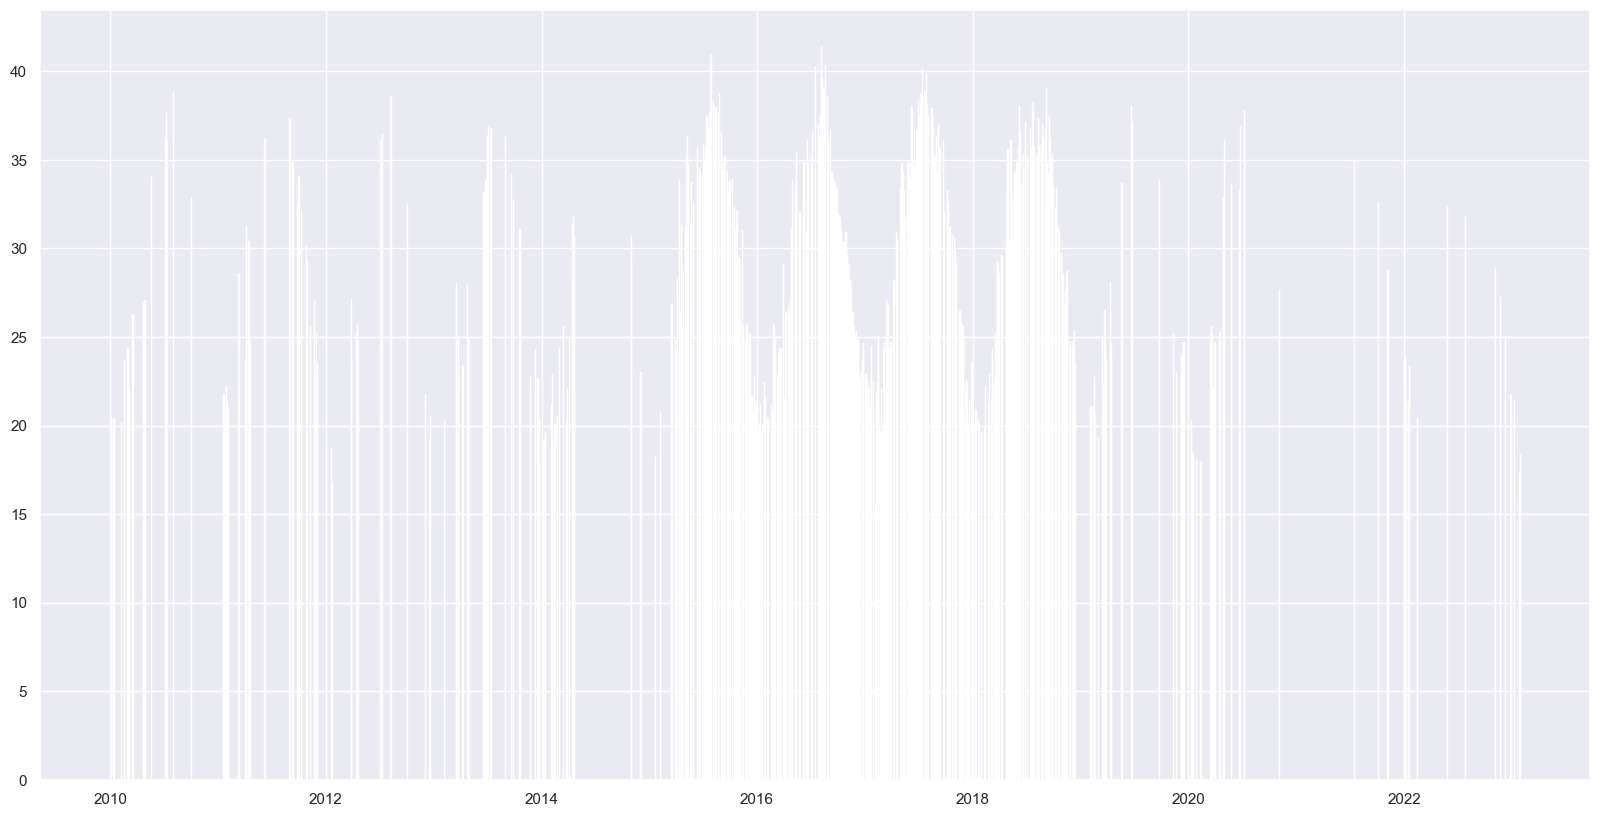

In [172]:
plt.figure(figsize=(20,10))
plt.bar(x=df['time'], height=df['tavg'])

,time,tavg,tmin,tmax,prcp,wspd
time,1.000000,-0.003285,0.024774,-0.016746,0.022295,0.174548
tavg,-0.003285,1.000000,0.976620,0.984676,-0.189182,-0.073294
tmin,0.024774,0.976620,1.000000,0.945561,-0.181356,0.007416
tmax,-0.016746,0.984676,0.945561,1.000000,-0.195230,-0.110566
prcp,0.022295,-0.189182,-0.181356,-0.195230,1.000000,0.115439
wspd,0.174548,-0.073294,0.007416,-0.110566,0.115439,1.000000


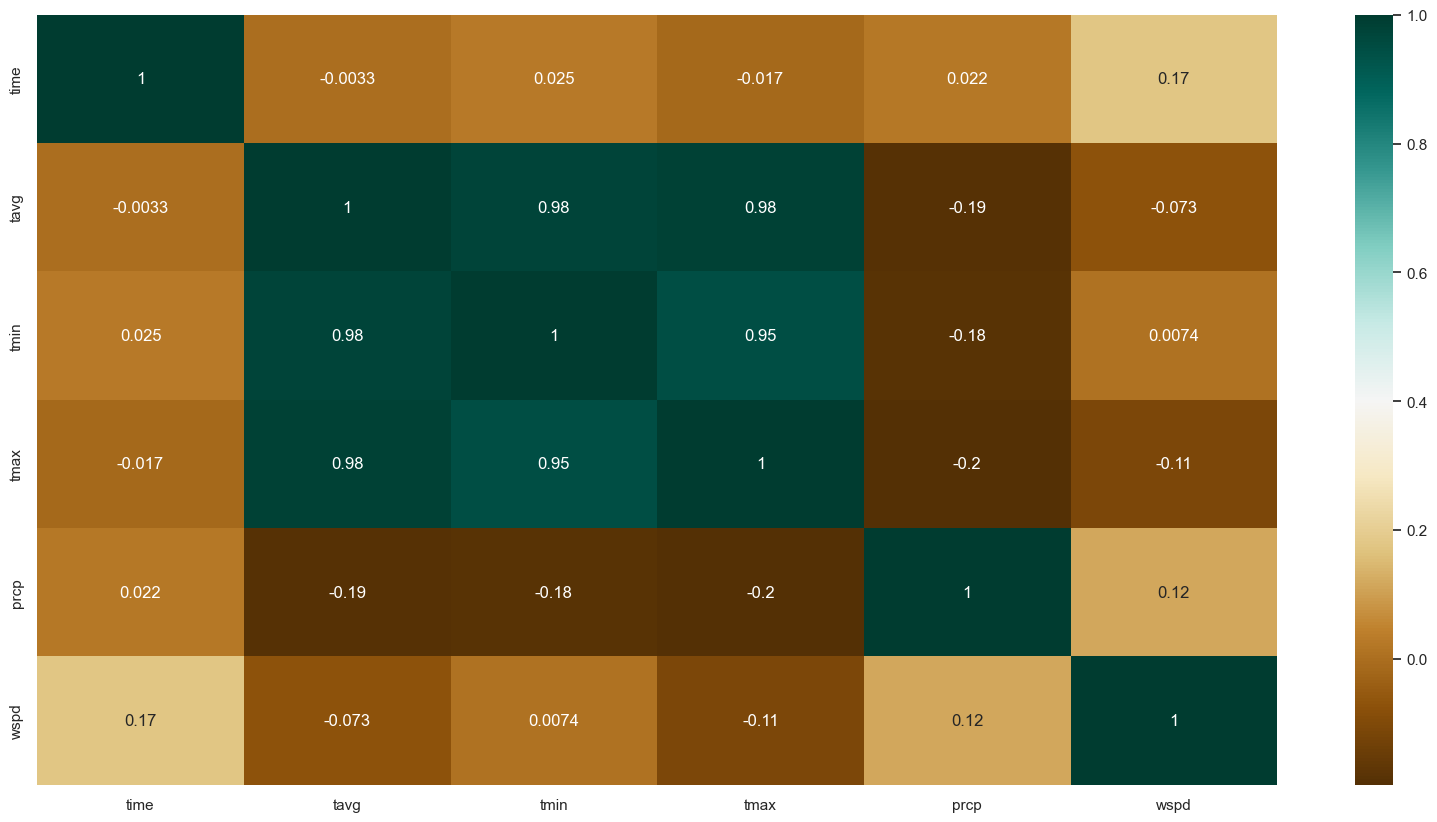

In [173]:
plt.figure(figsize=(20,10))
heatmapChart=df.corr()
sns.heatmap(heatmapChart, cmap='BrBG', annot=True)
heatmapChart

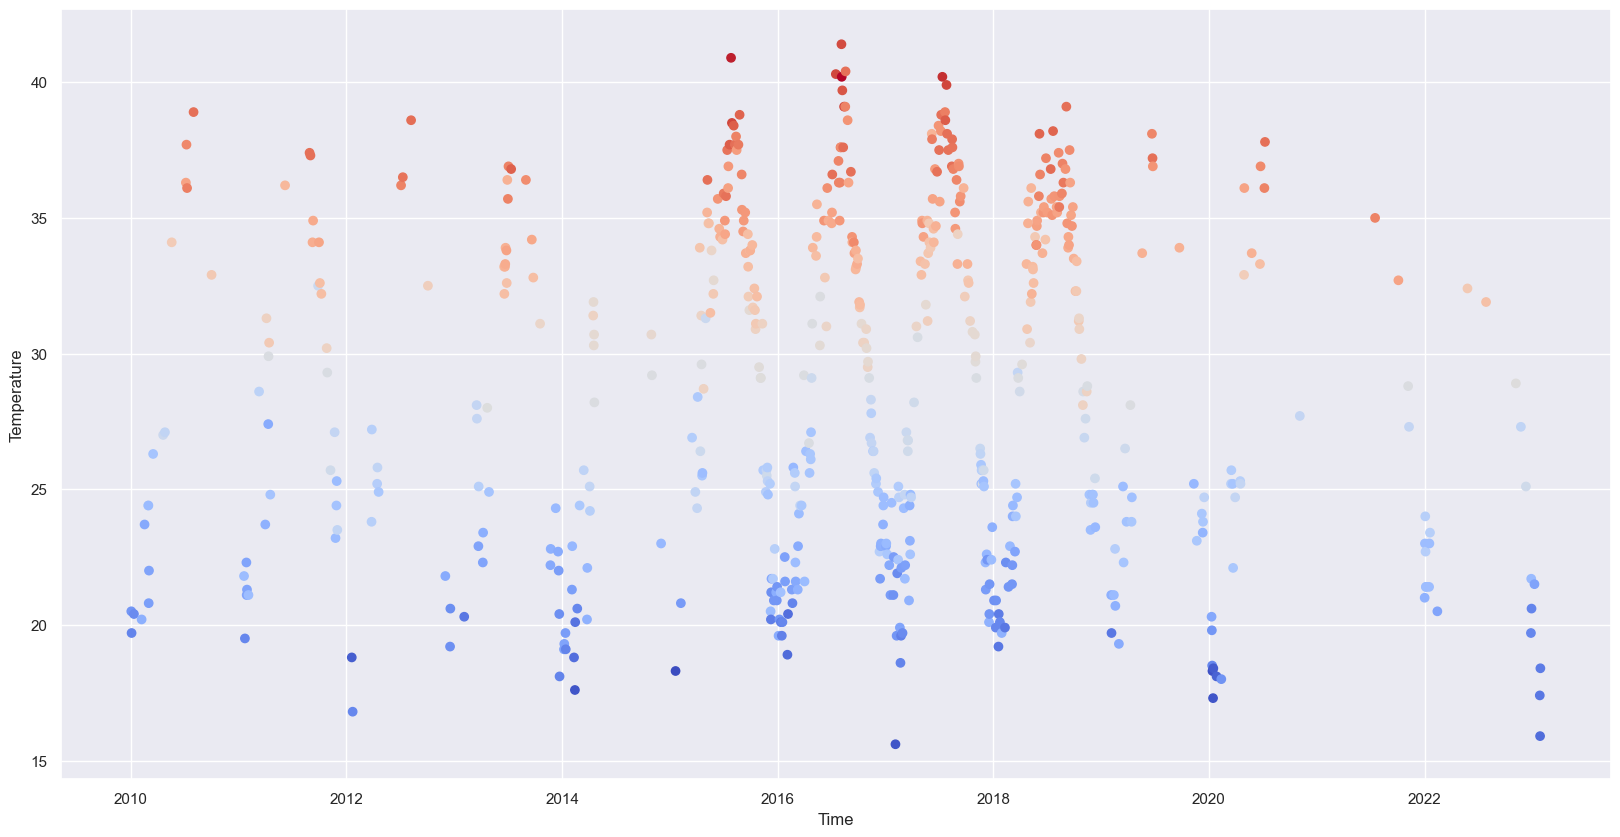

In [174]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(df['time'], df['tavg'], c=df['tmin'], cmap='coolwarm')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
plt.show()

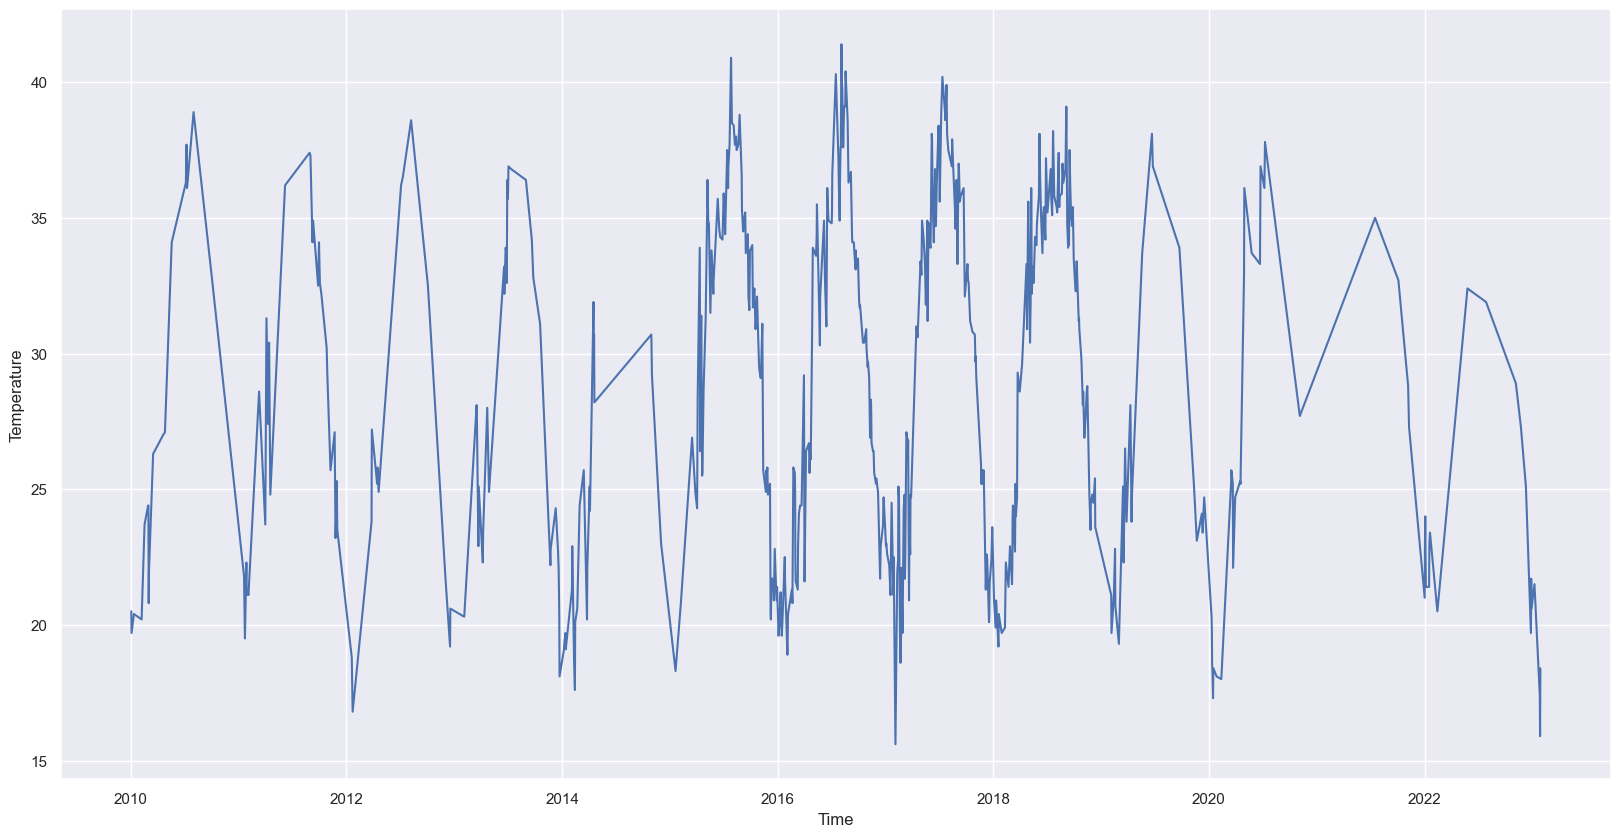

In [175]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(df['time'], df['tavg'])
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
plt.show()

In [176]:
df['time'] = pd.to_datetime(df['time'], format='%d/%m/%Y')
df['day'] = df['time'].dt.day
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year

# Getting the start & end range, this is useful when you want to finetune if model is not accurate enough
start_date = '2010-01-01' 
end_date = '2023-01-31'

df = df[(df['time'] >= start_date) & (df['time'] <= end_date)]
df = df.sort_values(by='time', ascending=True)

df = df[['day', 'month', 'year', 'time', 'tavg', 'tmin', 'tmax', 'prcp', 'wspd']]
df = df.drop(['time'], axis=1)

num_rows = 4775
df = df.head(num_rows)
df.head()

,day,month,year,tavg,tmin,tmax,prcp,wspd
1,2,1,2010,20.5,17.0,23.1,4.3,14.1
2,3,1,2010,19.7,15.8,23.6,0.3,8.6
10,11,1,2010,20.4,16.3,23.4,2.3,12.0
36,6,2,2010,20.2,18.9,23.0,1.0,9.8
46,16,2,2010,23.7,18.4,29.3,0.2,9.0


# Data Cleaning Done

In [177]:
x = df[['day', 'month', 'year', 'tmin', 'tmax', 'prcp', 'wspd']]
y = df['tavg']  

In [178]:
x = np.array(x)
y = np.array(y)

In [179]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

lir = LinearRegression()
rfr = RandomForestRegressor()

In [180]:
lir.fit(X_train, y_train)
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [181]:
lir.score(X_test, y_test)
print("Linear Regression AccuracyScore:", lir.score(X_test, y_test))

Linear Regression AccuracyScore: 0.9904517049304468


In [182]:
rfr.score(X_test, y_test)
print("Random Forest Regression AccuracyScore:", rfr.score(X_test, y_test))

Random Forest Regression AccuracyScore: 0.9885146262780198


In [183]:
pipeline = Pipeline([
('scaler', StandardScaler()),
('regressor', LinearRegression()),
])

pipeline2 = Pipeline([
('scaler', StandardScaler()),
('regressor', RandomForestRegressor()),
])

In [184]:
pipeline.fit(x, y)
pipeline2.fit(x, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor())])

In [185]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

lir = LinearRegression()
rfr = RandomForestRegressor()

In [186]:
lir.fit(X_train, y_train)
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [187]:
lir.score(X_test, y_test)
print("Linear Regression AccuracyScore:", lir.score(X_test, y_test))

Linear Regression AccuracyScore: 0.9904517049304468


In [188]:
rfr.score(X_test, y_test)
print("Random Forest Regression AccuracyScore:", rfr.score(X_test, y_test))

Random Forest Regression AccuracyScore: 0.9888904833378358


In [189]:
pipline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression()),
])

param_grid = {
    'regressor__fit_intercept': [True, False],
}

grid_search = GridSearchCV(pipline, param_grid, cv=5)
grid_search.fit(x, y)

print("Best Liner Regression Parameters: ", grid_search.best_params_)
print("Best Linear Regression Score: ", grid_search.best_score_)

pipline2 = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor()),
])

param_grid = {
    'regressor__n_estimators': [10, 50, 100],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(pipline2, param_grid, cv=5)
grid_search.fit(x, y)

print("Best Random Forest Regression Parameters: ", grid_search.best_params_)
print("Best Random Forest Regression Score: ", grid_search.best_score_)

Best Liner Regression Parameters:  {'regressor__fit_intercept': True}
Best Linear Regression Score:  0.9878070538997091
Best Random Forest Regression Parameters:  {'regressor__max_depth': 20, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 50}
Best Random Forest Regression Score:  0.9861047592025429


In [ ]:
joblib.dump(grid_search.best_estimator_, "model/Dubai_Weather_LR_Model.joblib")

['model/Dubai_Weather_LR_Model.joblib']